In [34]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
county_sales_csv = "resources/Cannabis_Sales_By_County.csv"
census_pop_csv = "resources/Census_pop.csv"
county_per_cap_income_csv = "resources/County Per capita income.csv"
retail_licenses_csv = "resources/retail-licenses.csv"


In [7]:
county_sales_df = pd.read_csv(county_sales_csv, parse_dates = ["Month Filter"])
census_pop_df = pd.read_csv(census_pop_csv)
county_per_cap_income_df = pd.read_csv(county_per_cap_income_csv)
retail_licenses_df = pd.read_csv(retail_licenses_csv)


county_sales_df

,County,Month Filter,Latitude (generated),Longitude (generated),Sales
0,Klamath,2019-01-01,42.8067,-121.8166,28029.69
1,Grant,2019-01-01,44.4798,-119.0090,60853.20
2,Lake,2019-01-01,42.8178,-120.6468,80451.52
3,Harney,2019-01-01,43.0263,-119.0802,89863.24
4,Jefferson,2019-01-01,44.6083,-121.0936,262448.04
...,...,...,...,...,...
721,Marion,2020-12-01,44.9852,-122.8053,6551116.36
722,Malheur,2020-12-01,43.2329,-117.6274,8582260.43
723,Lane,2020-12-01,43.8651,-122.7483,8767494.80
724,Washington,2020-12-01,45.5492,-123.1040,9481939.83


In [12]:
county_sales2019_df = county_sales_df.loc[county_sales_df["Month Filter"].dt.year == 2019, ["County", "Month Filter", "Sales"]]
county_sales2019_df

,County,Month Filter,Sales
0,Klamath,2019-01-01,28029.69
1,Grant,2019-01-01,60853.20
2,Lake,2019-01-01,80451.52
3,Harney,2019-01-01,89863.24
4,Jefferson,2019-01-01,262448.04
...,...,...,...
353,Marion,2019-12-01,4757998.96
354,Malheur,2019-12-01,4967885.97
355,Lane,2019-12-01,6276738.17
356,Washington,2019-12-01,7144125.29


In [27]:
total_2019_sales = county_sales2019_df.groupby("Month Filter").sum().reset_index(drop = False).rename(columns = {"Month Filter":"2019_Months", "Sales": "2019_Sales"})
total_2019_sales

,2019_Months,2019_Sales
0,2019-01-01,54280992.31
1,2019-02-01,52773889.66
2,2019-03-01,62119814.93
3,2019-04-01,62369873.76
4,2019-05-01,64574747.52
5,2019-06-01,66593082.79
6,2019-07-01,73144531.40
7,2019-08-01,79371526.47
8,2019-09-01,71611294.57
9,2019-10-01,70857737.06


In [14]:
county_sales2020_df = county_sales_df.loc[county_sales_df["Month Filter"].dt.year == 2020, ["County", "Month Filter", "Sales"]]
county_sales2020_df

,County,Month Filter,Sales
358,Union,2020-01-01,22718.51
359,Wallowa,2020-01-01,57932.53
360,Grant,2020-01-01,74349.48
361,Lake,2020-01-01,81268.24
362,Harney,2020-01-01,111883.71
...,...,...,...
721,Marion,2020-12-01,6551116.36
722,Malheur,2020-12-01,8582260.43
723,Lane,2020-12-01,8767494.80
724,Washington,2020-12-01,9481939.83


In [17]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [26]:
total_2020_sales = county_sales2020_df.groupby("Month Filter").sum().reset_index(drop = False).rename(columns = {"Month Filter":"2020_Months", "Sales": "2020_Sales"})
total_2020_sales

,2020_Months,2020_Sales
0,2020-01-01,68653599.90
1,2020-02-01,69788785.58
2,2020-03-01,84863480.48
3,2020-04-01,89747591.62
4,2020-05-01,103437574.34
5,2020-06-01,100490240.53
6,2020-07-01,106619102.02
7,2020-08-01,103897664.94
8,2020-09-01,97939284.21
9,2020-10-01,99128982.03


In [29]:
yoy_sales = pd.concat([total_2019_sales, total_2020_sales],axis=1,)
yoy_sales

,2019_Months,2019_Sales,2020_Months,2020_Sales
0,2019-01-01,54280992.31,2020-01-01,68653599.90
1,2019-02-01,52773889.66,2020-02-01,69788785.58
2,2019-03-01,62119814.93,2020-03-01,84863480.48
3,2019-04-01,62369873.76,2020-04-01,89747591.62
4,2019-05-01,64574747.52,2020-05-01,103437574.34
5,2019-06-01,66593082.79,2020-06-01,100490240.53
6,2019-07-01,73144531.40,2020-07-01,106619102.02
7,2019-08-01,79371526.47,2020-08-01,103897664.94
8,2019-09-01,71611294.57,2020-09-01,97939284.21
9,2019-10-01,70857737.06,2020-10-01,99128982.03


In [38]:
date = np.arange(0,12,1)
twotwoSales = yoy_sales["2020_Sales"]
twoOneSales = yoy_sales["2019_Sales"]

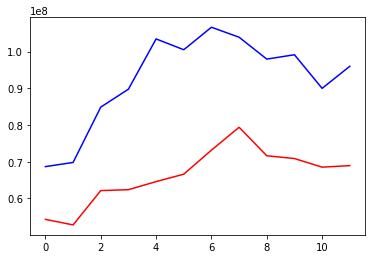

In [43]:
Sales_2020 = plt.plot(date, twotwoSales, color = "blue", label="2020 Sales")
Sales_2019 = plt.plot(date, twoOneSales, color = "red", label="2019 Sales")
# plt.legend(handles=[Sales_2020, Sales_2019], loc="best")

In [3]:
census_pop_df

,Geographic Area,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"Abbeville city, Alabama","2,688","2,705","2,699","2,694","2,643","2,628","2,608","2,600","2,584","2,575","2,571","2,560"
1,"Adamsville city, Alabama","4,522","4,506","4,500","4,493","4,471","4,449","4,420","4,390","4,356","4,327","4,308","4,281"
2,"Addison town, Alabama",758,754,751,750,743,742,739,734,731,726,723,718
3,"Akron town, Alabama",356,356,355,347,347,343,338,339,333,332,331,328
4,"Alabaster city, Alabama","30,352","31,112","31,209","31,375","31,684","31,980","32,182","32,772","33,017","33,275","33,413","33,487"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19497,"Wamsutter town, Wyoming",451,451,450,453,462,487,508,499,493,483,474,467
19498,"Wheatland town, Wyoming","3,627","3,625","3,622","3,620","3,626","3,622","3,642","3,645","3,587","3,549","3,527","3,462"
19499,"Worland city, Wyoming","5,487","5,487","5,487","5,436","5,419","5,419","5,328","5,332","5,263","5,158","5,071","5,024"
19500,"Wright town, Wyoming","1,807","1,807","1,810","1,812","1,864","1,860","1,856","1,885","1,857","1,760","1,754","1,753"


In [45]:
oregon_city_pop = census_pop_df.loc[census_pop_df["Geographic Area"].str.endswith("Oregon"), ["Geographic Area", "Census", "2019"]].reset_index(drop=True)
oregon_city_pop = oregon_city_pop.rename(columns={"Census": "2020"})
oregon_city_pop

,Geographic Area,2020,2019
0,"Adair Village city, Oregon",840,874
1,"Adams city, Oregon",350,357
2,"Adrian city, Oregon",177,173
3,"Albany city, Oregon","50,158","55,338"
4,"Amity city, Oregon","1,614","1,724"
...,...,...,...
235,"Woodburn city, Oregon","24,080","26,273"
236,"Wood Village city, Oregon","3,878","4,093"
237,"Yachats city, Oregon",690,784
238,"Yamhill city, Oregon","1,024","1,169"


In [46]:
for index, row in county_per_cap_income_df.iterrows():
    county_name = row["County"].split(", ")[0]
    county_per_cap_income_df.loc[index, "County"] = county_name
county_per_cap_income_df

,County,Personal income (thousands of dollars),Population,Per capita income ($)
0,Baker,685166,16124,42494
1,Benton,4534024,93053,48725
2,Clackamas,25812808,418187,61726
3,Clatsop,1893791,40224,47081
4,Columbia,2409293,52354,46019
5,Coos,2994046,64487,46429
6,Crook,1039221,24404,42584
7,Curry,1042502,22925,45474
8,Deschutes,11159204,197692,56447
9,Douglas,4698282,110980,42334


In [47]:
county_per_cap_income_df.dtypes
county_sales_df["Sales"] = county_sales_df["Sales"].astype("int64")
county_sales_df = county_sales_df.loc[:, ["County","Sales"]]
county_sales_gb = county_sales_df.groupby("County").sum()
county_sales_gb

,Sales
County,
Baker,38104656
Benton,25192866
Clackamas,96333325
Clatsop,28003264
Columbia,19719909
Coos,31776430
Curry,22127595
Deschutes,99825595
Douglas,35516968


In [63]:
sales_per_capita_df = county_per_cap_income_df.merge(county_sales_gb, on="County", how="inner")
sales_per_capita_df["Sales Per income"] = (sales_per_capita_df["Personal income (thousands of dollars)"] / sales_per_capita_df["Sales"])*100
sales_per_capita_df.sort_values("Sales Per income", ascending = False)

,County,Personal income (thousands of dollars),Population,Per capita income ($),Sales,Sales Per income
26,Union,1119594,26835,41721,647700,172.86
2,Clackamas,25812808,418187,61726,96333325,26.80
29,Washington,38527576,601592,64043,184802534,20.85
23,Polk,3692806,86085,42897,18530641,19.93
27,Wallowa,331884,7208,46044,1718440,19.31
1,Benton,4534024,93053,48725,25192866,18.00
9,Grant,308754,7199,42888,2043709,15.11
30,Yamhill,5086605,107100,47494,35008125,14.53
15,Klamath,2839572,68238,41613,20770597,13.67
19,Linn,5816653,129749,44830,43019746,13.52


In [49]:
retail_licenses_df

,TRADE NAME,POSTAL CITY,COUNTY,STREET ADDRESS,ZIP,Med Grade,Delivery
0,420VILLE,HUNTINGTON,BAKER,210 W. WASHINGTON ST.,97907,NaN,NaN
1,HOTBOX FARMS,HUNTINGTON,BAKER,120 E WASHINGTON ST,97907,Yes,NaN
2,SUMPTER NUGGET,SUMPTER,BAKER,"160 N. MILL STREET, SUITE #102",97877,Yes,NaN
3,THE COUGHIE POT,SUMPTER,BAKER,363 B SOUTH MILL STREET PO BOX 74,97877,NaN,NaN
4,BEATNICK'S FINEST,CORVALLIS,BENTON,126 SW AVERY AVE,97333,NaN,NaN
...,...,...,...,...,...,...,...
732,CANNA BROS.,NEWBERG,YAMHILL,2316 E PORTLAND RD SUITE C-2,97132,Yes,NaN
733,OASIS CANNABIS,NEWBERG,YAMHILL,"308 VILLA ROAD, SUITE 115",97132,Yes,Yes
734,WESTERN OREGON DISPENSARY INC,NEWBERG,YAMHILL,1013 N. SPRINGBROOK RD.,97132,Yes,Yes
735,CANNA BROS.,SHERIDAN,YAMHILL,1210 W MAIN ST,97378,Yes,NaN


In [ ]:
census_pop_df